# DBSCAN Clustering Analysis for Termite Data

In this Jupyter Notebook, we will explore the application of DBSCAN, a density-based clustering technique, to uncover patterns in termite data. DBSCAN is particularly useful for datasets with complex structures and varying densities, making it an ideal choice for ecological data analysis.


## Load and Preprocess Data

We start by loading the dataset and conducting necessary preprocessing steps such as handling missing values and normalizing the data to ensure it's suitable for DBSCAN clustering.


In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../../global_termite_microbe_wd.csv')  # Adjust the path as needed

data['deployment_date'] = pd.to_datetime(data['deployment_date'])
data['harvest_date'] = pd.to_datetime(data['harvest_date'], format='%Y-%m-%dT%H:%M:%SZ')
data['deployment_duration'] = (data['harvest_date'] - data['deployment_date']).dt.days

# Drop rows with missing values
data_cleaned = data.dropna()

# Select numerical columns for clustering
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(numerical_cols)

## Explaining DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are close to each other based on a distance measurement and a minimum number of points. It is excellent for data which contains clusters of similar density. DBSCAN is different from k-means in that it does not require the number of clusters to be defined in advance and can identify outliers as points that do not belong to any cluster.

### DBSCAN Parameters:
- **eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point.


In [2]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_normalized)

# Adding cluster labels to the original data
data_cleaned['Cluster'] = clusters


C:\Users\isabe\AppData\Local\Temp\ipykernel_25308\2247050336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = clusters


## Visualizing Clusters

Visualizing the results of DBSCAN clustering can help us understand the distribution and density of the data clusters. We use a simple scatter plot to show how data points are grouped together and identify noise.


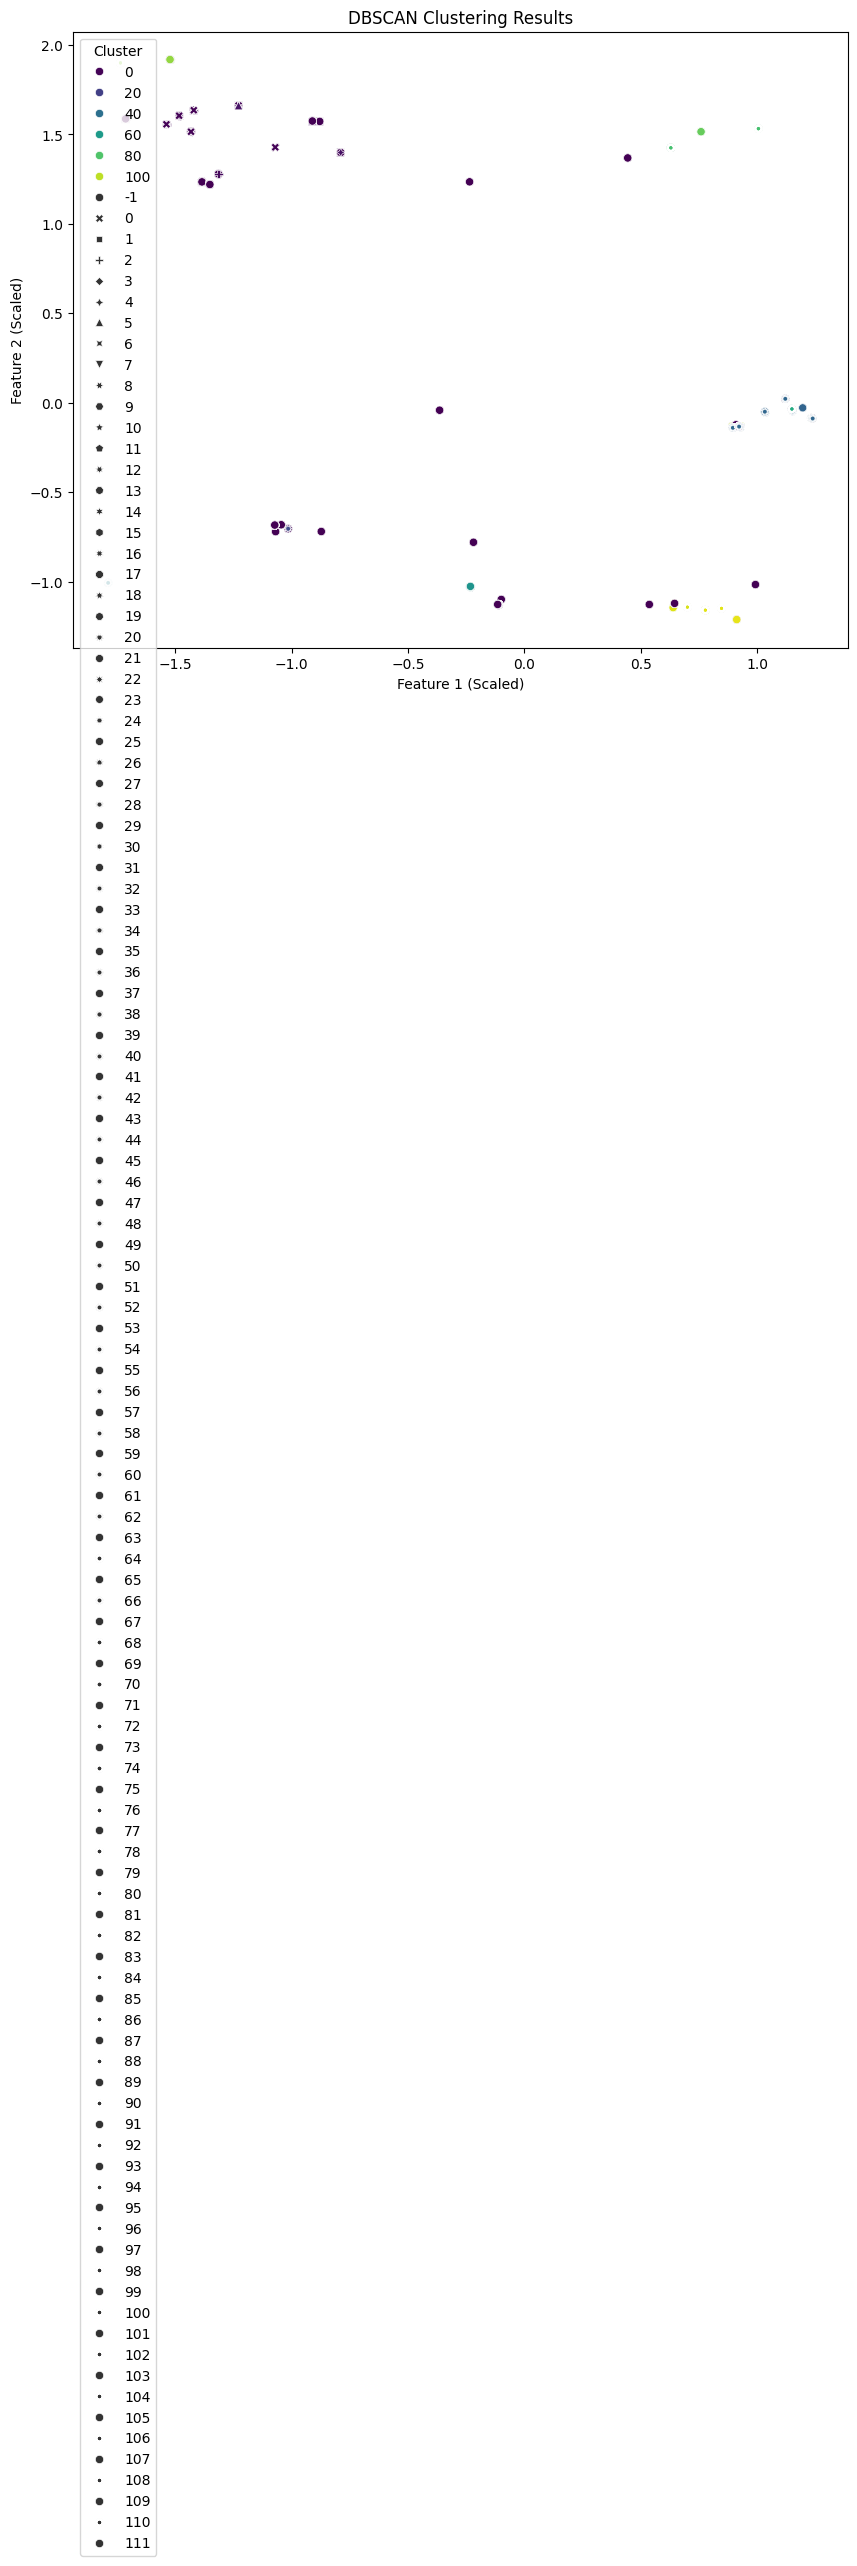

In [3]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_normalized[:, 0], y=data_normalized[:, 1], hue=data_cleaned['Cluster'], palette='viridis', style=data_cleaned['Cluster'], markers=True)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()


## Tuning DBSCAN Parameters

DBSCAN's effectiveness largely depends on its two main parameters: `eps` (epsilon) and `min_samples`. These parameters define how clusters are formed by determining the density required to form a cluster.

### Understanding the Parameters:
- **`eps` (epsilon)**: This parameter specifies the maximum distance between two points for one to be considered as in the neighborhood of the other. A smaller `eps` value makes the clustering more restrictive, as fewer points qualify as neighbors. Conversely, a larger `eps` can expand the neighborhood, potentially merging separate clusters.
- **`min_samples`**: This defines the minimum number of points required to form a dense region, which directly influences what DBSCAN considers as a core point. Increasing `min_samples` results in fewer core points, which can decrease the number of clusters and increase the number of outliers.

### Experimenting with Parameters:
To demonstrate the impact of these parameters, we will perform clustering using different combinations of `eps` and `min_samples` and visualize the results. This will help us understand how each parameter influences the formation of clusters and the identification of noise within the dataset.


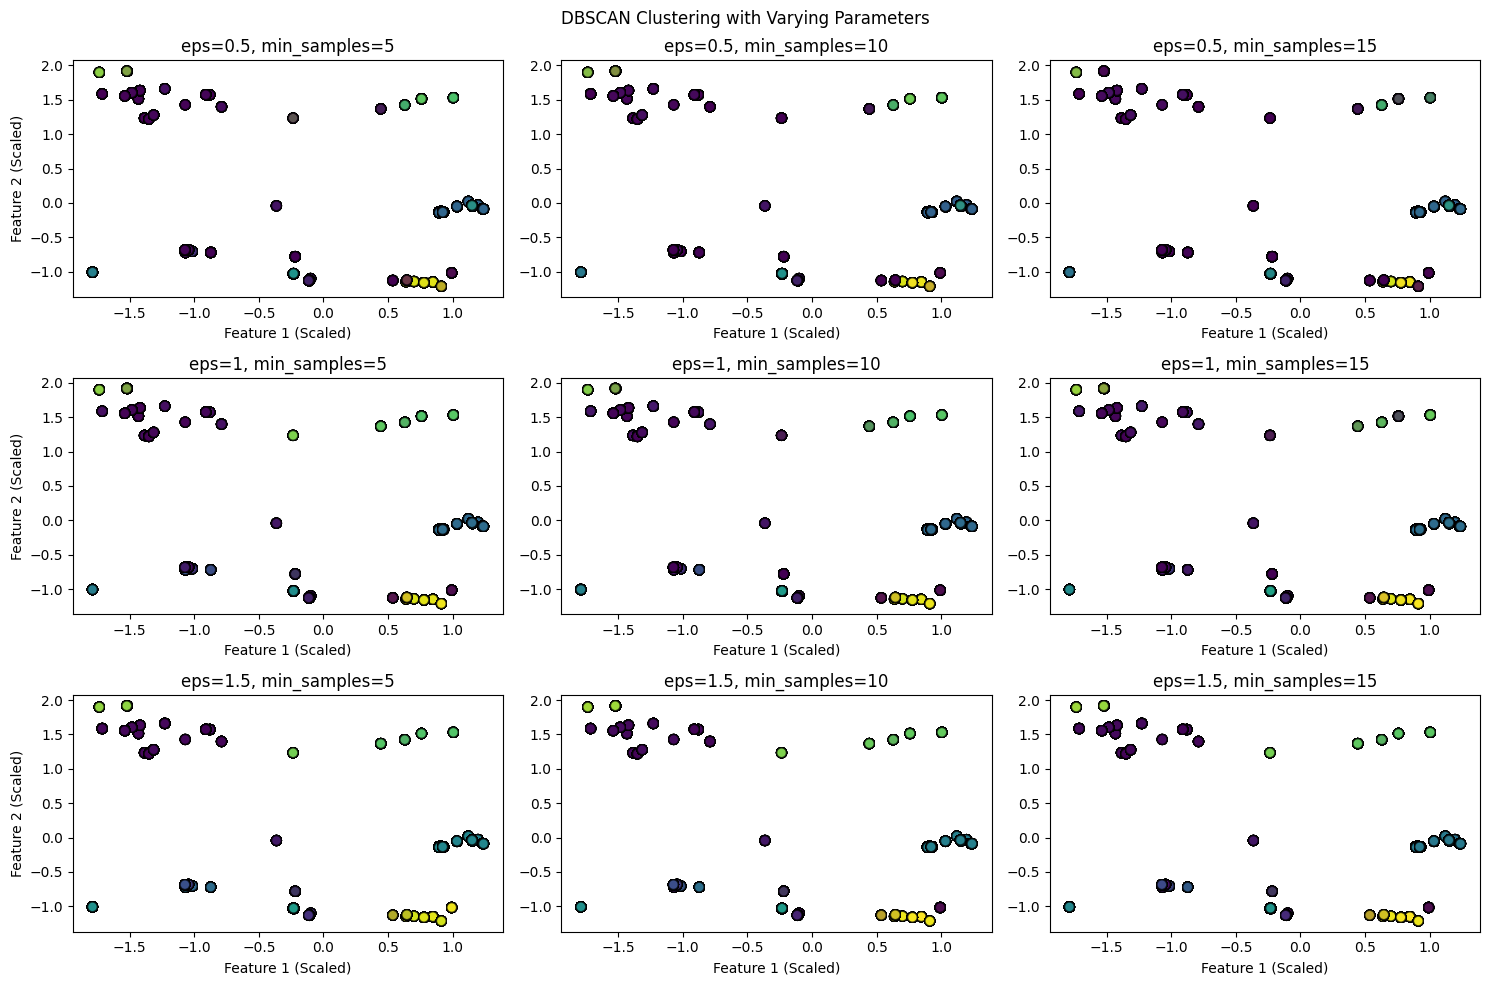

In [4]:
# Experiment with different eps and min_samples values
eps_values = [0.5, 1, 1.5]  # Example epsilon values to try
min_samples_values = [5, 10, 15]  # Example min_samples values to try

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))
fig.suptitle('DBSCAN Clustering with Varying Parameters')

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_normalized)
        
        # Plotting the clusters
        axes[i, j].scatter(data_normalized[:, 0], data_normalized[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
        axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        axes[i, j].set_xlabel('Feature 1 (Scaled)')
        if j == 0:
            axes[i, j].set_ylabel('Feature 2 (Scaled)')

plt.tight_layout()
plt.show()


## Visualizing Clusters with Dimensionality Reduction

Dimensionality reduction techniques like PCA (Principal Component Analysis) are invaluable for visualizing high-dimensional clustering results in two or three dimensions. This simplification allows us to visually assess the clustering output and better understand the distribution of data.

### Why Use PCA?
- **Simplification**: Reduces the number of dimensions while retaining most of the variability in the dataset, simplifying the visualization without losing significant information.
- **Visualization**: Allows us to plot high-dimensional data on a 2D or 3D plot, making it possible to observe clustering patterns that are not discernible in higher dimensions.

### Applying PCA with DBSCAN:
After applying DBSCAN, we will use PCA to reduce the dataset to two principal components. This transformation will be plotted to show how data points are grouped into clusters, providing a visual representation of our clustering analysis. This step is crucial for interpreting the effectiveness of DBSCAN with the chosen parameters and for identifying areas where clusters are formed or where outliers are present.


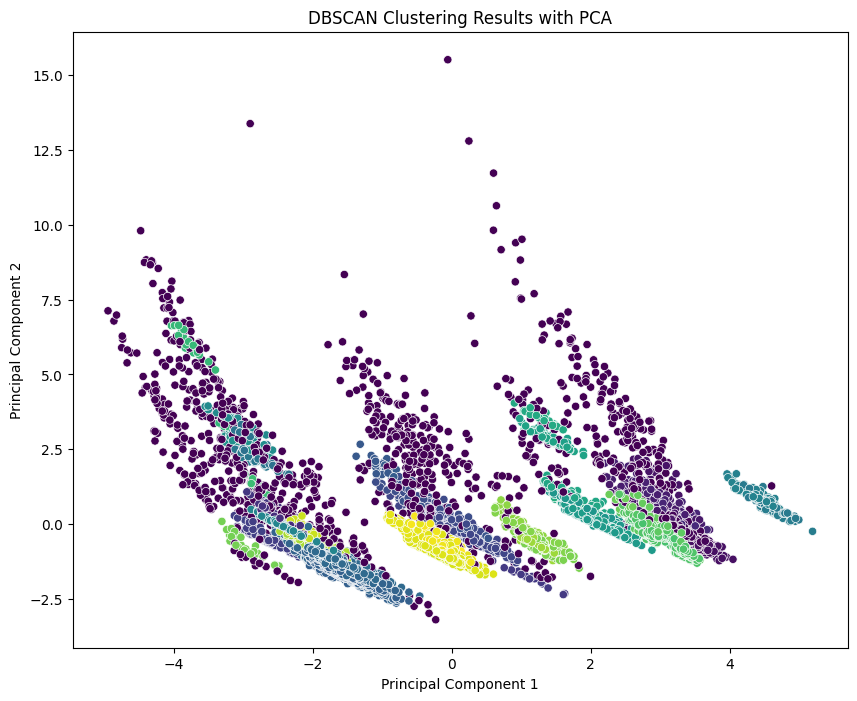

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensions with PCA for better visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=10)  # Adjusted parameters
clusters = dbscan.fit_predict(data_normalized)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', legend=None)
plt.title('DBSCAN Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Conclusion

This notebook has provided a detailed exploration of the DBSCAN clustering algorithm applied to termite-related data. By adjusting the `eps` and `min_samples` parameters, we observed how these changes impact the clustering results, allowing for a nuanced understanding of DBSCAN's sensitivity to its parameters.

### Key Takeaways:
- **Parameter Sensitivity**: We demonstrated that DBSCAN's performance and the characteristics of the clusters it forms are highly dependent on the `eps` and `min_samples` settings. Selecting appropriate values for these parameters is crucial for effective clustering.
- **Handling of Noise**: DBSCAN effectively identifies and segregates outlier data points as noise, which is particularly useful in datasets with anomalies or outliers.
- **Visualization with PCA**: Using PCA for dimensionality reduction enabled us to visualize the clustering outcomes in a lower-dimensional space, providing clear insights into the grouping dynamics and the spatial distribution of the data.

### Implications for Termite Data Analysis:
- The clusters identified through DBSCAN can help in understanding the spatial and environmental factors that influence termite presence and wood characteristics. This information can be valuable for ecological research and practical applications in pest management.
- By identifying dense clusters and outliers, researchers and practitioners can develop targeted strategies for monitoring and managing termite populations based on environmental conditions and geographic locations.

### Future Work:
- **Exploring Other Clustering Algorithms**: Comparing DBSCAN with other clustering techniques like hierarchical clustering or k-means could further enrich our understanding of the data.
- **Advanced Parameter Tuning**: Techniques such as grid search or automated algorithms could be employed to optimize `eps` and `min_samples` more systematically.
- **Integrating Domain Knowledge**: Incorporating expert knowledge from entomology could help in interpreting the clusters more effectively and aligning them with biological insights.

By thoroughly analyzing clustering with DBSCAN, this notebook not only highlights the utility of density-based clustering in real-world applications but also sets the stage for further studies and advanced data-driven decision-making in termite ecology.

